In [3]:
import pandas as pd

# Load the dataset
file_path = 'glass.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


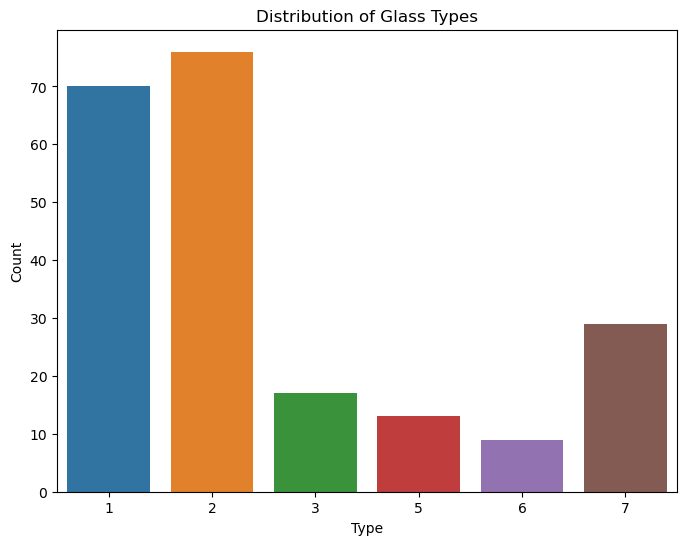

In [8]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title("Distribution of Glass Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

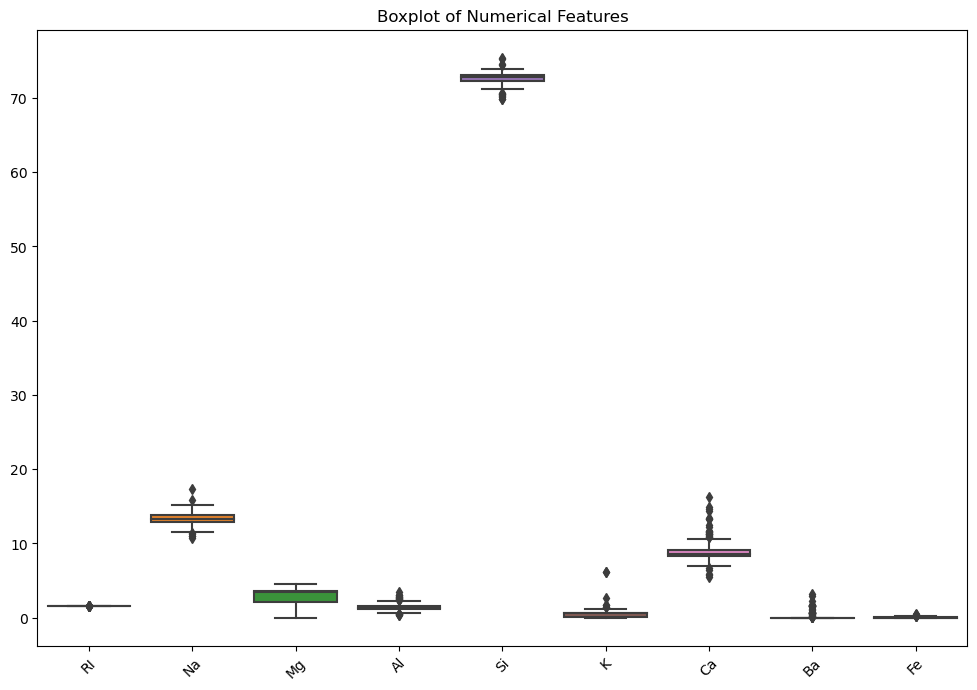

In [9]:
# Selecting only the numerical features for visualization
numerical_features = df.drop(columns=['Type'])

# Visualize the distributions of numerical features using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


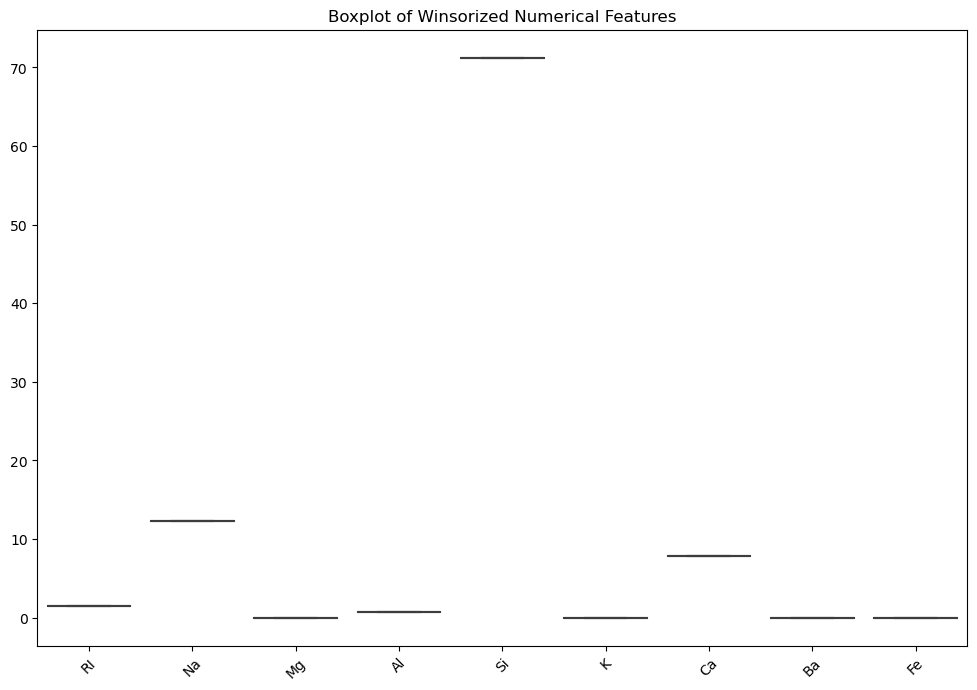

In [10]:
from scipy.stats.mstats import winsorize

# Set the percentile limits for winsorization (e.g., 5th and 95th percentiles)
lower_limit = 0.05
upper_limit = 0.95

# Apply winsorization to each numerical feature
winsorized_features = pd.DataFrame()
for column in numerical_features.columns:
    winsorized_column = winsorize(numerical_features[column], limits=(lower_limit, upper_limit))
    winsorized_features[column] = winsorized_column

# Visualize the distributions of winsorized features using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=winsorized_features)
plt.title("Boxplot of Winsorized Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Type'])  # Features
y = df['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8372093023255814

Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43


Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the base estimator (Random Forest)
base_estimator = RandomForestClassifier(random_state=42)

# Initialize the Bagging classifier
bagging_classifier = BaggingClassifier(base_estimator, random_state=42)

# Train the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the performance of the Bagging classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy (Bagging):", accuracy_bagging)

print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging))

print("\nConfusion Matrix (Bagging):")
print(confusion_matrix(y_test, y_pred_bagging))


Accuracy (Bagging): 0.8604651162790697

Classification Report (Bagging):
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.85      0.79      0.81        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.93      0.83      0.85        43
weighted avg       0.88      0.86      0.86        43


Confusion Matrix (Bagging):
[[11  0  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier with a base estimator (Decision Tree)
adaboost_classifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=42),
                                         algorithm='SAMME',
                                         random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the performance of the AdaBoost classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy (AdaBoost):", accuracy_adaboost)

print("\nClassification Report (AdaBoost):")
print(classification_report(y_test, y_pred_adaboost))

print("\nConfusion Matrix (AdaBoost):")
print(confusion_matrix(y_test, y_pred_adaboost))


Accuracy (AdaBoost): 0.7674418604651163

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.78      0.50      0.61        14
           3       0.50      1.00      0.67         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.77        43
   macro avg       0.81      0.80      0.78        43
weighted avg       0.80      0.77      0.76        43


Confusion Matrix (AdaBoost):
[[10  0  0  0  0  1]
 [ 4  7  3  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]
